In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
archivo = 'clean_data.csv'

df = pd.read_csv(archivo)


In [8]:
df

,Date,Country,State,Activity,Sex,Age,Deceased,Month,Year
0,2022-09-01,south africa,WESTERN CAPE PROVINCE,swimming,F,39.0,Y,September,2022.0
1,2022-09-01,bahamas,NaN,diving,F,58.0,Y,September,2022.0
2,2022-09-01,usa,HAWAII,swimming,F,51.0,N,September,2022.0
3,2022-08-01,australia,NEW SOUTH WALES,surfing,M,14.0,N,August,2022.0
4,2022-08-01,australia,NEW SOUTH WALES,kayaking,M,NaN,N,August,2022.0
...,...,...,...,...,...,...,...,...,...
6376,NaT,italy,SARDINIA,swimming,M,NaN,Y,NaN,NaN
6377,1703-03-01,barbados,SOUTHWEST COAST,swimming,M,19.0,N,March,1703.0
6378,NaT,france,NaN,Unspecific,M,NaN,Y,NaN,NaN
6379,NaT,france,CÔTE D'AZUR,Unspecific,M,NaN,N,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6381 entries, 0 to 6380
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5975 non-null   object 
 1   Country   6358 non-null   object 
 2   State     6008 non-null   object 
 3   Activity  6381 non-null   object 
 4   Sex       6381 non-null   object 
 5   Age       3672 non-null   float64
 6   Deceased  6381 non-null   object 
 7   Month     5975 non-null   object 
 8   Year      5975 non-null   float64
dtypes: float64(2), object(7)
memory usage: 448.8+ KB


In [6]:
# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

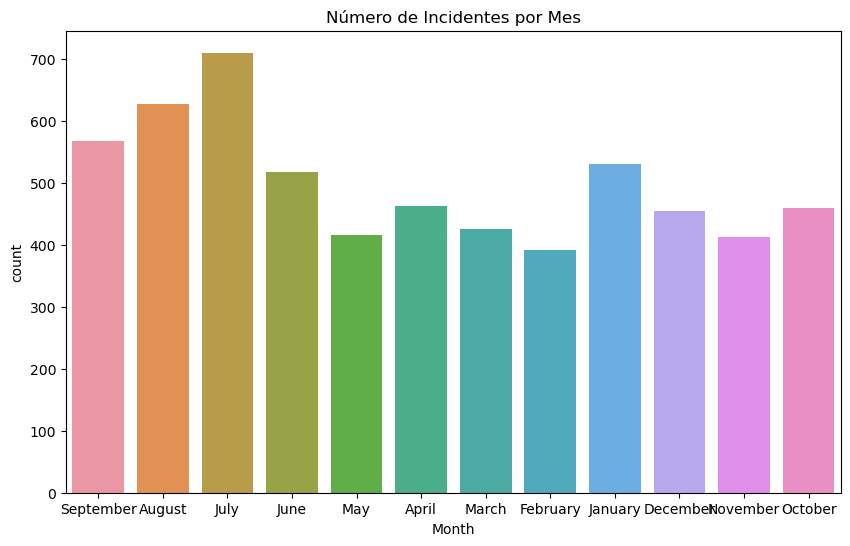

In [10]:
# Gráfico del número de incidentes por mes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month')
plt.title('Número de Incidentes por Mes')
plt.show()


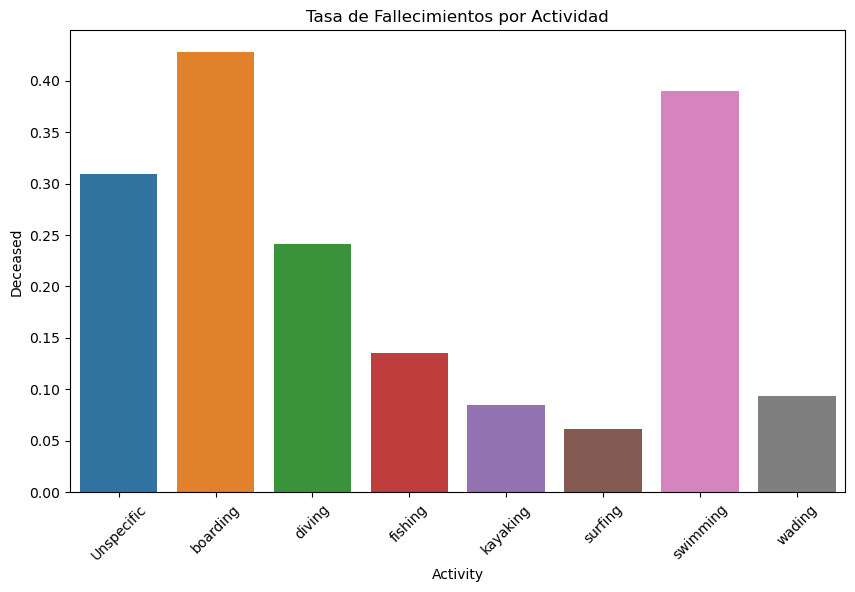

In [11]:
# Gráfico de tasa de fallecimientos por actividad
df['Deceased'] = df['Deceased'].map({'Y': 1, 'N': 0})
activity_deaths = df.groupby('Activity')['Deceased'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=activity_deaths, x='Activity', y='Deceased')
plt.title('Tasa de Fallecimientos por Actividad')
plt.xticks(rotation=45)
plt.show()


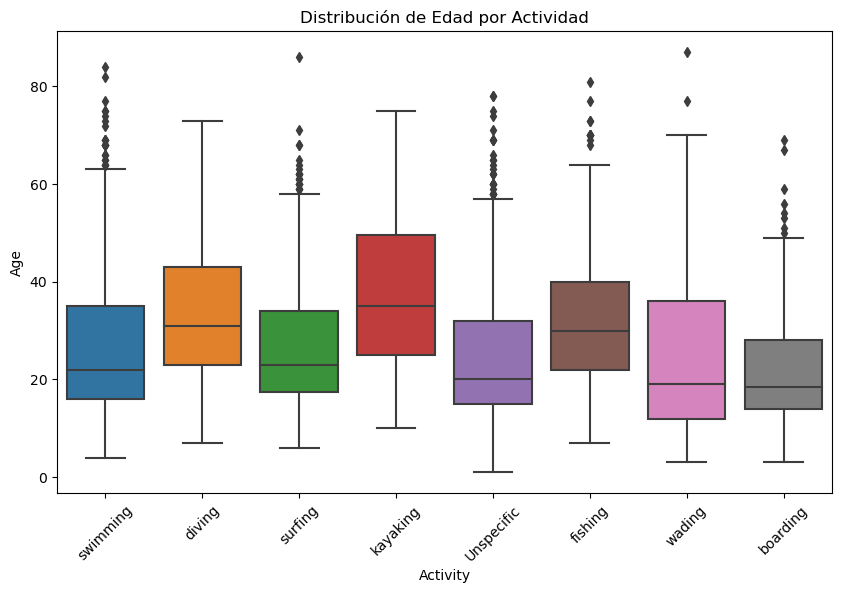

In [12]:
# Boxplot de edad por actividad
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Activity', y='Age')
plt.title('Distribución de Edad por Actividad')
plt.xticks(rotation=45)
plt.show()

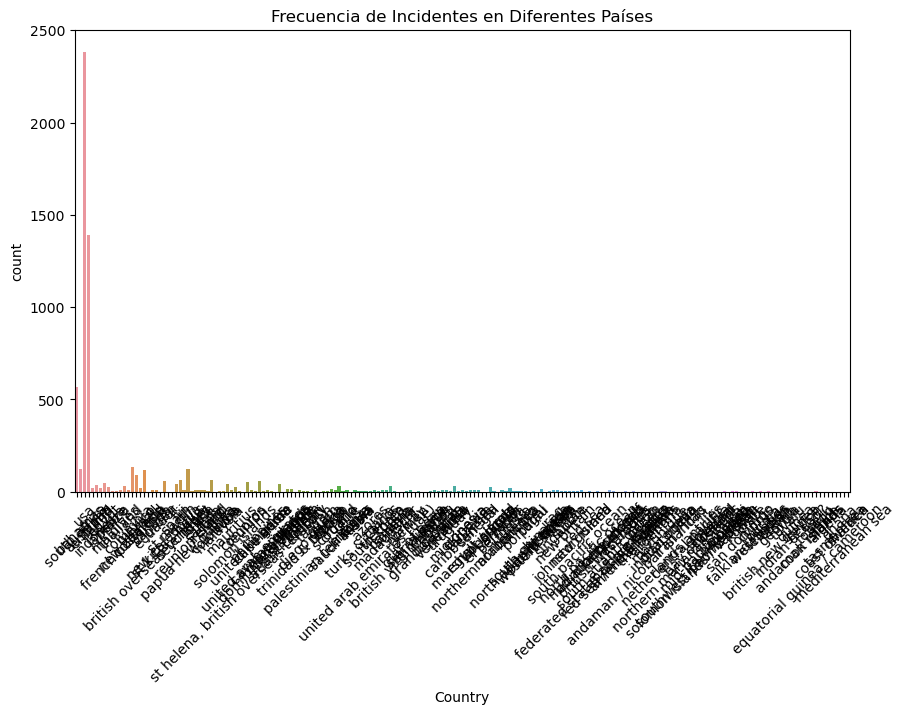

In [13]:
# Gráfico de frecuencia de incidentes en diferentes países
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country')
plt.title('Frecuencia de Incidentes en Diferentes Países')
plt.xticks(rotation=45)
plt.show()

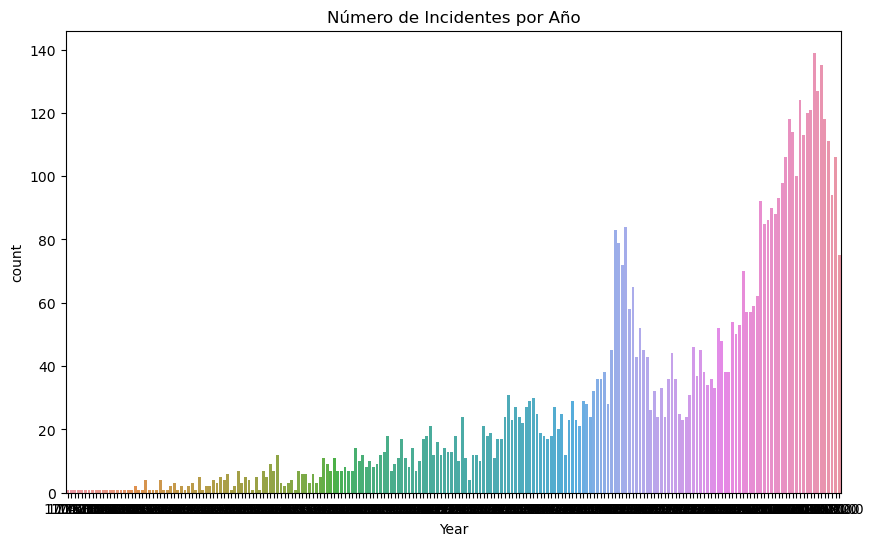

In [14]:
# Tendencia de Incidentes por Año
plt.figure(figsize=(10, 6))
df['Year'] = df['Date'].dt.year
sns.countplot(data=df, x='Year')
plt.title('Número de Incidentes por Año')
plt.show()

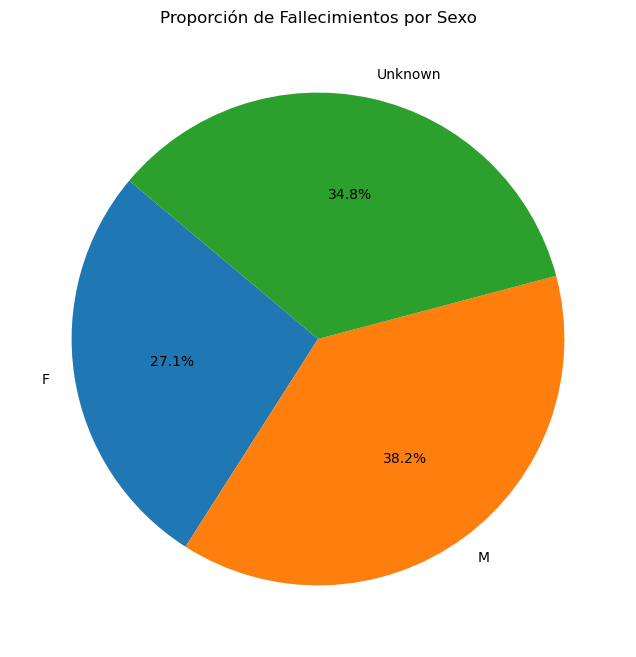

In [15]:
# Proporción de Fallecimientos por Sexo
sex_death_ratio = df.groupby('Sex')['Deceased'].mean().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(sex_death_ratio['Deceased'], labels=sex_death_ratio['Sex'], autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Fallecimientos por Sexo')
plt.show()

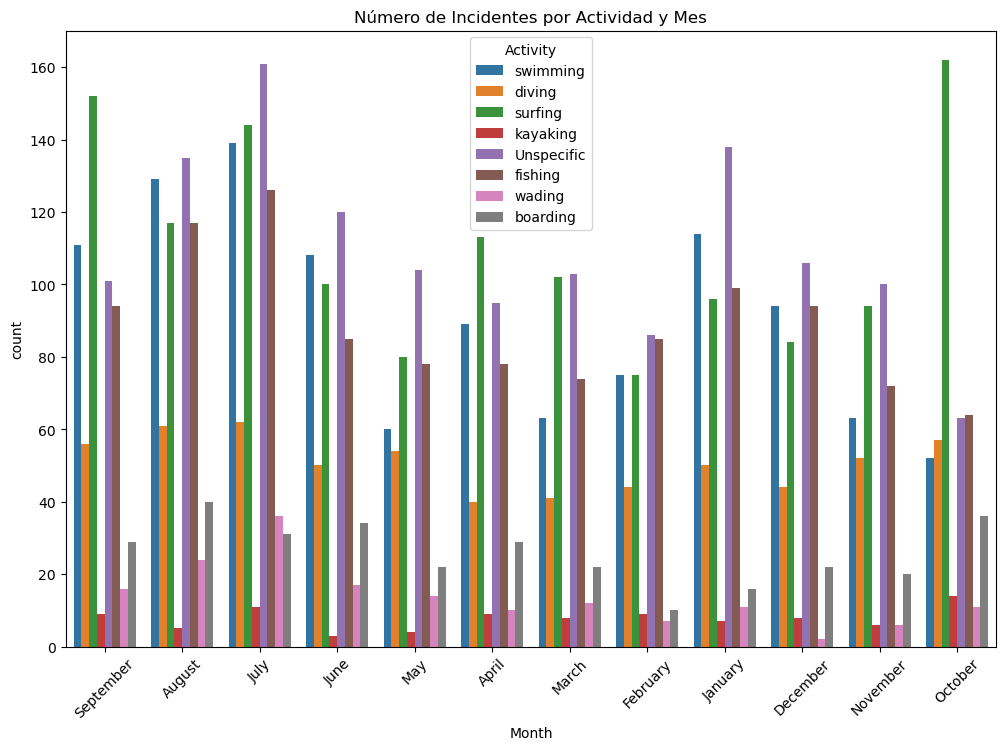

In [16]:
# Número de Incidentes por Actividad y Mes
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Month', hue='Activity')
plt.title('Número de Incidentes por Actividad y Mes')
plt.xticks(rotation=45)
plt.show()

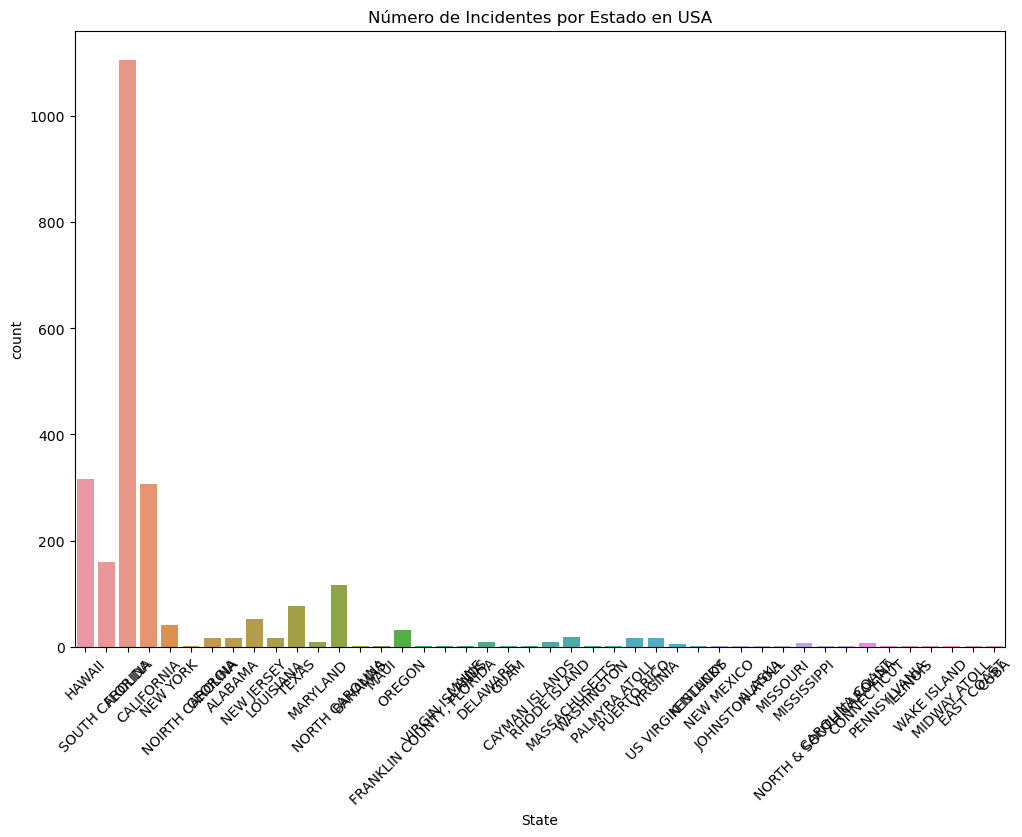

In [17]:
# Incidentes por Estado en un usa
usa_states = df[df['Country'] == 'usa']
plt.figure(figsize=(12, 8))
sns.countplot(data=usa_states, x='State')
plt.title('Número de Incidentes por Estado en USA')
plt.xticks(rotation=45)
plt.show()

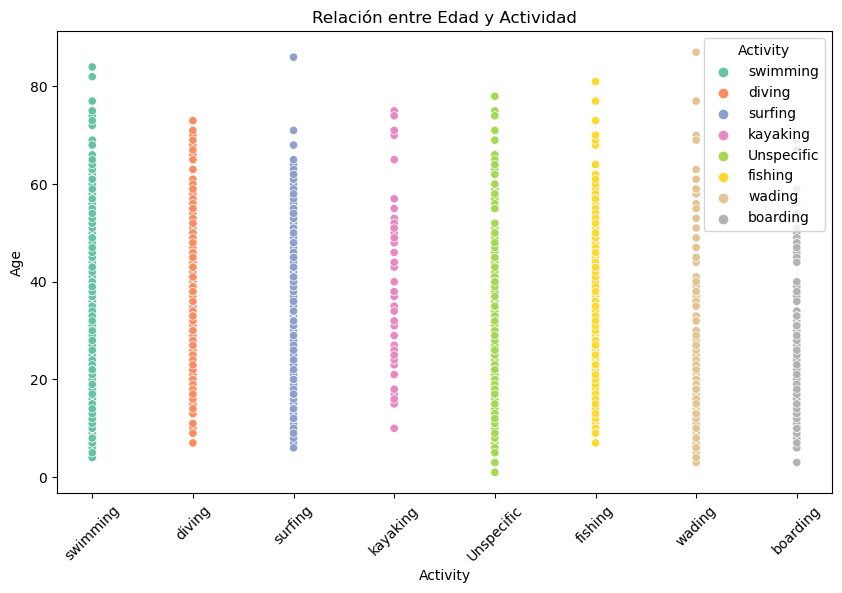

In [18]:
# 6. Relación entre Edad y Actividad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Activity', y='Age', hue='Activity', palette='Set2')
plt.title('Relación entre Edad y Actividad')
plt.xticks(rotation=45)
plt.show()